# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

np.int64(71)

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

##### Сгруппируем данные по количеству детей и среднему возврату кредитов 


In [23]:
df_mean = data.groupby('children')['debt'].mean()
df_mean

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

##### Пока делать выводы рано - копнем глубже. Посмотрим количество представителей каждой подгруппы.

In [24]:
df_count = data.groupby('children')['debt'].count()
df_count

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64

##### Наиболее многочисленная группа - бездетные люди. Группы с 4-мя и 5-ю детьми рассматривать нельзя из-за малого количества выборки. Пойдем дальше и для удобного анализа объединим таблицы. 

In [25]:
result = pd.pivot_table(data=data, index='children', values='debt', aggfunc=['count', 'sum', 'mean' ])
result.columns = ['Всего кредитополучателей', 'Всего должников', 'Доля задолжников']
result

,Всего кредитополучателей,Всего должников,Доля задолжников
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


##### Составим свобдную таблицу, в которой учтем доходы клиента

In [26]:
pivot_table = pd.pivot_table(data=data,
                             values='debt',
                             index=['children', 'total_income_category'],
                             aggfunc='mean')
pivot_table

debt
children total_income_category          
0        A                      0.083333
         B                      0.067776
         C                      0.078313
         D                      0.049383
         E                      0.117647
1        A                      0.111111
         B                      0.075407
         C                      0.098540
         D                      0.060606
         E                      0.000000
2        A                      0.000000
         B                      0.081673
         C                      0.098545
         D                      0.117647
         E                      0.000000
3        A                      0.000000
         B                      0.045455
         C                      0.093220
         D                      0.200000
4        B                      0.142857
         C                      0.088235
5        B                      0.000000
         C                      0.000000
         D                      0.000000

##### Для более наглядного изучения построим график зависимости среднего возварта в срок от количества детей клиента.

Text(0, 0.5, 'Доля должников')

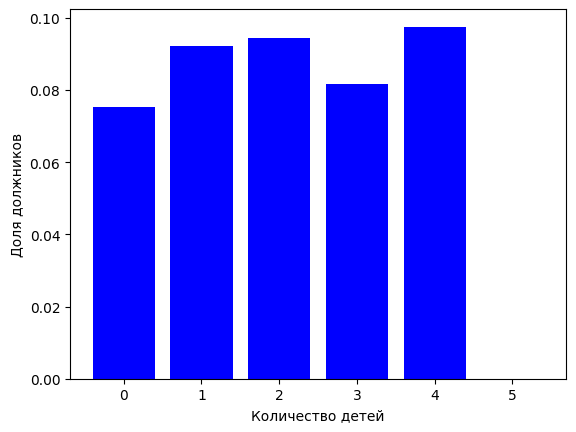

In [27]:
import matplotlib.pyplot as plt
plt.bar(df_mean.index, df_mean.values, color='blue')
plt.xlabel('Количество детей')
plt.ylabel('Доля должников')

**Вывод:** по результатам ннаешго небольшого анализа можем увидеть, что наименьшее количество долгов у клиентов без детей (7.5% должников). Наиболее часто просрочка по платежам встречается у группы клиентов с двумя детьми (9.5% должников). Однако у группы с тремя детьми просрочка по отношению к прошлой группе идет на спад (8.1% должников). Группы с четырьмя и пятью детьми не рассматриваем из-за малого объема выборки. Итак, мы установили зависимость между количеством детей и вероятностью просрочек платежей. Зависимость подчиняется нормальному закону. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

##### Посмотрим значения столбца family_status

In [28]:
family_value_counts = data['family_status'].value_counts()
family_value_counts

family_status
женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: count, dtype: int64

##### Узнаем среднее значение должников в каждой группе

In [29]:
family_debt_mean = data.groupby('family_status')['debt'].mean()
family_debt_mean 

family_status
Не женат / не замужем    0.097639
в разводе                0.070648
вдовец / вдова           0.066246
гражданский брак         0.093130
женат / замужем          0.075606
Name: debt, dtype: float64

##### Посмотрим средний заработок в каждой группе

In [30]:
for i in data['family_status'].unique():
    print(i, data[data['family_status']==i]['total_income'].mean())

женат / замужем 166757.1225838023
гражданский брак 164819.4092888244
вдовец / вдова 142559.78969505784
в разводе 167955.22708158116
Не женат / не замужем 166552.38447782546


##### Заметим, что при среднем наименьешм заработке клиенты из группы вдовец/вдова имеют наименьший процент просрочек 

In [31]:
data[data['family_status']=='вдовец / вдова']['purpose'].value_counts()

purpose
покупка коммерческой недвижимости         43
покупка жилья                             39
операции с жильем                         36
строительство жилой недвижимости          36
покупка жилья для семьи                   35
операции со своей недвижимостью           34
операции с коммерческой недвижимостью     33
ремонт жилью                              32
сделка с подержанным автомобилем          32
автомобиль                                30
жилье                                     30
строительство недвижимости                30
покупка недвижимости                      29
операции с недвижимостью                  29
недвижимость                              29
покупка жилья для сдачи                   28
высшее образование                        28
строительство собственной недвижимости    27
образование                               26
получение дополнительного образования     26
на покупку подержанного автомобиля        24
на покупку автомобиля                     24
до

##### Составим сводную таблицу из найденных данных

In [32]:
pivot_table = pd.pivot_table(data= data,
                             values=['debt'],
                             index='family_status',
                             aggfunc=['mean', 'count']
                             )
pivot_table

,mean,count
,debt,debt
family_status,,
Не женат / не замужем,0.097639,2796
в разводе,0.070648,1189
вдовец / вдова,0.066246,951
гражданский брак,0.093130,4134
женат / замужем,0.075606,12261


##### Построим гистограмму для удобного восприятия данных

([0, 1, 2, 3, 4],
 [Text(0, 0, 'женат / замужем'),
  Text(1, 0, 'гражданский брак'),
  Text(2, 0, 'вдовец / вдова'),
  Text(3, 0, 'в разводе'),
  Text(4, 0, 'Не женат / не замужем')])

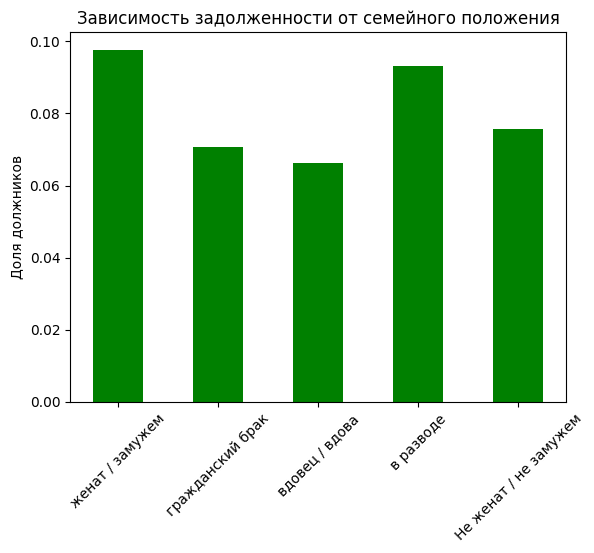

In [33]:
plt.bar(data['family_status'].unique(), family_debt_mean.values, color='green', width=0.5)
plt.ylabel('Доля должников')
plt.title('Зависимость задолженности от семейного положения')
plt.xticks(rotation=45)

**Вывод:** в процессе исследования выявлена закономерность. Семйеное положение действительно влияет на шанс возврата кредита в срок. Таким образом, люди состоящие в браке или недавно разведенные имеют наибольшую возможность просрочек.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

##### Посмотрим значения столбца income_type

In [34]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data['income_type'].value_counts()

income_type
сотрудник          11015
компаньон           5047
пенсионер           3812
госслужащий         1451
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: count, dtype: int64

##### Посмотрим значения столбца total_income_category

In [35]:
data['total_income_category'].value_counts()

total_income_category
C    15921
B     5014
D      349
A       25
E       22
Name: count, dtype: int64

In [36]:
income_type = data['income_type'].unique()
income_type

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

**Вывод:** 

##### Сгруппируем значения по столбцу total_income_category и среднему заработку

In [37]:
income_category_median = data.groupby('total_income_category')['total_income'].median()
income_category_median

total_income_category
A    1223042.0
B     257558.0
C     130355.0
D      43929.0
E      26431.0
Name: total_income, dtype: float64

##### Сохраним средений шанс просрочек по каждой группе числа заработка в переменной category_debt

In [38]:
category_debt = data.groupby('total_income_category')['debt'].mean()
category_debt

total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64

##### Группа с самым низким заработком чаще всего имеет просрочки по платежкам. Отсюда интересно рассмотреть группы А и С.

##### Составим сводную таблицу по Категории заработка и Должности: выведем их среднюю возможность просрочек по кредитам

In [39]:
pd.pivot_table(data = data,
                 values= ['debt'],
                 index=['total_income_category', 'income_type'],
                 aggfunc=['mean'])

mean
                                           debt
total_income_category income_type              
A                     компаньон        0.133333
                      сотрудник        0.000000
B                     безработный      0.000000
                      госслужащий      0.049180
                      компаньон        0.062897
                      пенсионер        0.056159
                      предприниматель  0.000000
                      сотрудник        0.083051
C                     безработный      1.000000
                      в декрете        1.000000
                      госслужащий      0.063208
                      компаньон        0.080049
                      пенсионер        0.057124
                      сотрудник        0.099483
                      студент          0.000000
D                     госслужащий      0.041667
                      компаньон        0.040000
                      пенсионер        0.042683
                      сотрудник        0.088235
E                     госслужащий      0.000000
                      компаньон        0.000000
                      пенсионер        0.133333
                      сотрудник        0.000000

In [57]:
income_type_debt = data.groupby('income_type')['debt'].mean()
income_type_debt

income_type
безработный        0.500000
в декрете          1.000000
госслужащий        0.059269
компаньон          0.074103
пенсионер          0.056663
предприниматель    0.000000
сотрудник          0.095688
студент            0.000000
Name: debt, dtype: float64

In [50]:
data[data['income_type'] == 'сотрудник']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21515,1,467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486,заняться образованием,C,получение образования
21519,1,2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949,покупка коммерческой недвижимости,C,операции с недвижимостью
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


In [49]:
data[data['income_type'] == 'компаньон']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
10,2,4171.483647,36,высшее,0,женат / замужем,0,M,компаньон,0,113943,покупка недвижимости,C,операции с недвижимостью
14,0,1844.956182,56,высшее,0,гражданский брак,1,F,компаньон,1,165127,покупка жилой недвижимости,C,операции с недвижимостью
33,0,1548.637544,48,среднее,1,женат / замужем,0,F,компаньон,0,157245,покупка жилья,C,операции с недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21512,0,165.377752,26,высшее,0,Не женат / не замужем,4,M,компаньон,0,147301,получение дополнительного образования,C,получение образования
21514,0,280.469996,27,неоконченное высшее,2,Не женат / не замужем,4,M,компаньон,0,355988,строительство недвижимости,B,операции с недвижимостью
21516,0,914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807,покупка своего жилья,B,операции с недвижимостью
21517,0,404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059,на покупку своего автомобиля,C,операции с автомобилем


In [48]:
data[data['income_type'] == 'в декрете']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
20845,2,3296.759962,39,среднее,1,женат / замужем,0,F,в декрете,1,53829,автомобиль,C,операции с автомобилем


##### Визуализируем полученные данные

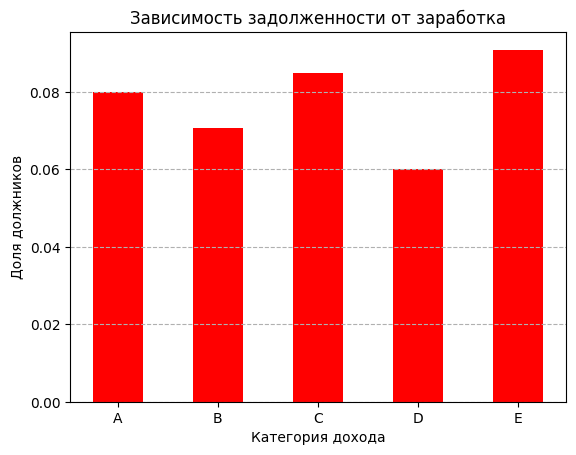

In [41]:
plt.bar(category_debt.index, category_debt.values, color='red', width=0.5)
plt.xlabel('Категория дохода')
plt.ylabel('Доля должников')
plt.title('Зависимость задолженности от заработка')
plt.grid(axis='y',linestyle='--') 

Text(0.5, 1.0, 'Зависимость задолженности от должности')

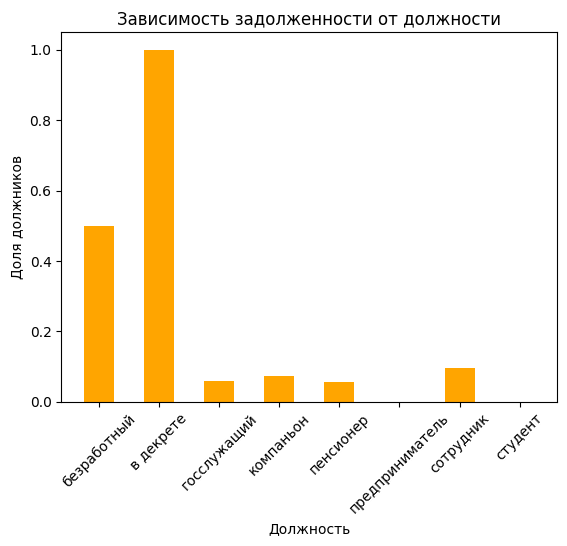

In [59]:
plt.bar(income_type_debt.index, income_type_debt.values, color='orange', width=0.5)
plt.xticks(rotation= 45)
plt.xlabel('Должность')
plt.ylabel('Доля должников')
plt.title('Зависимость задолженности от должности')

**Вывод:** по результатм исследования установлно, что наибольший шанс просрочек по кредиту у группы с наименьшим заработком (гр. Е - 9%). Далее идет группа со средними доходами (гр. С - 8.5%). По простой логике распределение должно быть экспоненциальным, НО наиболее интересная группа А с самым большиим заработком стоит на треьем месте по невыплатам в срок. Мы не нашли прямой зависимости между уровнем дохода и возможностью задолженности. Однако еще проверив должности клиентов мы установили, что большая часть невыплативших кредиты в срок - безработные. Женщин в декрете рассматривать нельзя из-за малой выборки.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

##### Посмотрим уникальные значения столбца purpose_category

In [42]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
purpose = data['purpose_category'].unique()

##### Найдем среднее значения просочек по каждой категории. Для этого сгруппируем по стобцу purposse_category и применим метод mean()

In [92]:
purpose_data = data.groupby('purpose_category')['debt'].mean()

##### Чаще всего просрочки по платежам совершают клиенты, которые берут кредиты на 'операции с автомобилем' и 'на получение образования'

##### Посмотрим как внутри каждой категории распределены люди с разным заработком

In [98]:
pd.pivot_table(data = data,
                 values= ['debt'],
                 index=['purpose_category', 'income_type'],
                 aggfunc=['mean', 'count'])

mean count
                                              debt  debt
purpose_category         income_type                    
операции с автомобилем   в декрете        1.000000     1
                         госслужащий      0.077465   284
                         компаньон        0.080153  1048
                         пенсионер        0.064475   791
                         сотрудник        0.112297  2155
операции с недвижимостью безработный      0.500000     2
                         госслужащий      0.047809   753
                         компаньон        0.065982  2531
                         пенсионер        0.048910  1881
                         предприниматель  0.000000     1
                         сотрудник        0.086707  5582
                         студент          0.000000     1
получение образования    госслужащий      0.082031   256
                         компаньон        0.076030   947
                         пенсионер        0.066759   719
                         сотрудник        0.110358  2066
проведение свадьбы       госслужащий      0.044304   158
                         компаньон        0.097889   521
                         пенсионер        0.059382   421
                         предприниматель  0.000000     1
                         сотрудник        0.082508  1212

##### Подробнее изучим кредиты на автомобили

In [90]:
data_auto = data.loc[data['purpose_category'] == 'операции с автомобилем']['income_type'].value_counts()
'''pd.pivot_table(data=data_auto,
               values=['purpose_category'],
               index=['income_type'],
               aggfunc=['count'])'''
data_auto          

income_type
сотрудник      2155
компаньон      1048
пенсионер       791
госслужащий     284
в декрете         1
Name: count, dtype: int64

##### Визуализируем данные

Text(0.5, 1.0, 'Зависимость задолженности от цели кредита')

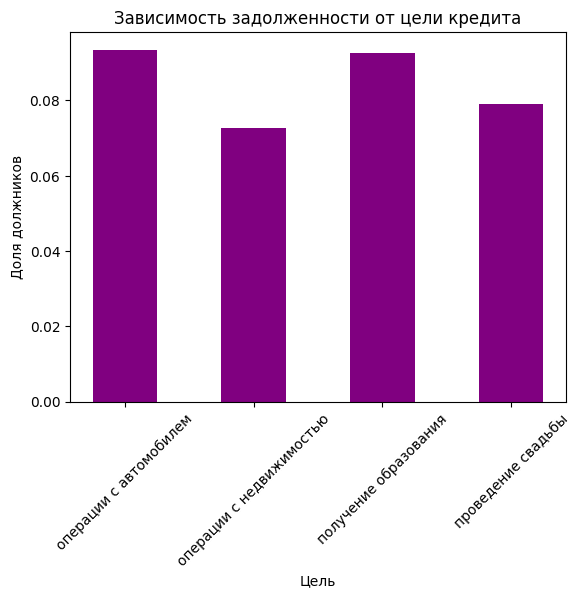

In [94]:
plt.bar(purpose_data.index, purpose_data.values, color='purple', width=0.5)
plt.xticks(rotation=45)
plt.xlabel('Цель')
plt.ylabel('Доля должников')
plt.title('Зависимость задолженности от цели кредита')

**Вывод:** из результатов исследования не удалось найти зависимости между целбю кредита и его возвратом в срок

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

##### Вообще пропуски в данных могу появляться по разным причинам:

1. **Ошибки при сборе данных**:  
   Пропуски могут возникнуть из-за сбоев в оборудовании или программном обеспечении, используемом для сбора данных.

2. **Человеческий фактор**:  
   Операторы или пользователи могли случайно пропустить заполнение некоторых полей.

3. **Несоответствие форматов данных**:  
   При объединении данных из разных источников могут возникнуть пропуски из-за несовпадения форматов или отсутствия данных в одном из источников.

4. **Утрата данных**:  
   Данные могли быть утеряны из-за сбоев в системе хранения или передачи данных.

5. **Неполные анкеты**:  
   Пользователи могли намеренно или случайно не заполнить некоторые поля в анкетах или формах.

6. **Фильтрация данных**:  
   При обработке данных некоторые записи могли быть удалены или отфильтрованы, оставив пропуски в связанных полях.

7. **Устаревшие данные**:  
   Некоторые записи могли быть неполными из-за устаревания информации или отсутствия обновлений.

8. **Политика конфиденциальности**:  
   Некоторые данные могли быть намеренно скрыты или удалены для соблюдения требований конфиденциальности.

##### В неашем датасете мы получили пропуски в нескольких категориях: **заработка** и **отработанных дней**. Интересно, что их число совпадает — значит, они возникают вместе.

##### Пропуски в заработке:
1. **Отсутствие заработка**:  
   Человек на момент взятия кредита мог не зарабатывать, и вместо указания "0" оставил поле пустым.
2. **Непонимание формата**:  
   Клиент мог не понять, за какой промежуток времени нужно указать заработок (месяц, год, квартал и т.д.).
3. **Неофициальная работа**:  
   Клиент мог работать неофициально и не захотел указывать свои доходы.

##### Пропуски в отработанных днях:
1. **Отсутствие официальной работы**:  
   Если клиент официально не работал, он мог пропустить заполнение этого поля.
2. **Связь с пропусками в заработке**:  
   Пропуски в отработанных днях могут быть связаны с тем, что клиент не указал заработок, так как эти данные взаимосвязаны.

Таким образом, пропуски в данных могут быть вызваны как объективными причинами (например, отсутствие работы), так и субъективными (непонимание формата или нежелание указывать данные).

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* заполнить данные медианными значениями - лучший выбор в нескольких случаях.
1. **Присутствие выбросов**
<br>Если в данных есть выбросы, то они могут сильно искажать ожидания. Медианные значения позволят предотвратить искажения
2. **Небольшой объем количественных данных**
<br>В небольшом объеме количсетвенных данных выбросы будут сильно искажать ожидания, поэтому заполнение медианным значением - более надежное решение
3. **Сильная ассиметрия выборки**
<br>В случаях, когда данные имеют "большую голову" и "длинный хвост", медианное значение лучше отразит значение в центре


### Шаг 4: общий вывод.

#### Резюме по проекту:
1. **Описание данных**:  
   В исходных данных содержались пропуски, аномалии и дубликаты, которые потребовали предварительной обработки. Данные включали информацию о клиентах, их доходах, стаже работы, количестве детей и целях получения кредита.

2. **Обработка аномалий**:  
   - Отрицательные значения в столбце стажа работы были исправлены с использованием метода `abs()`.  
   - Аномально болшие значения в столбце количества детей  были удалены.

3. **Заполнение пропусков**:  
   - Пропуски в столбцах с доходами и стажем работы были заполнены медианными значениями, рассчитанными по категориям рода деятельности.

4. **Удаление дубликатов**:  
   - Были удалены явные дубликаты, чтобы избежать искажения результатов анализа.

5. **Группировка данных**:  
   - Данные были разделены на группы по уровню дохода (`total_income_category`) и целям кредита (`purpose_category`).

6. **Анализ данных**:  
   - Проведен анализ зависимости вероятности задолженности от различных факторов, таких как уровень дохода, количество детей и цели кредита.  
   - Выявлены категории клиентов с наибольшей вероятностью задолженности.

#### Рекомендации по улучшению сбора данных:
1. **Улучшение качества данных**:  
   - Уточнить формат заполнения данных, чтобы избежать пропусков (например, указать, за какой период нужно вводить доход).  
   - Добавить автоматическую проверку на корректность вводимых данных (например, исключить возможность ввода отрицательных значений).

2. **Снижение количества пропусков**:  
   - Сделать обязательными для заполнения ключевые поля, такие как доход и стаж работы.  
   - Уточнить инструкции для клиентов, чтобы минимизировать ошибки при заполнении анкет.

3. **Обработка аномалий на этапе сбора данных**:  
   - Внедрить автоматические проверки на наличие выбросов и аномалий (например, слишком большие значения количества детей).

#### Портрет добросовестного заемщика:
- **Доход**: Средний или высокий уровень дохода.  
- **Семейное положение**: Женат/замужем.  
- **Количество детей**: Отсутствие детей или 1 ребенок.  
- **Цель кредита**: Покупка недвижимости или автомобиля.  
- **Стаж работы**: Длительный стаж работы в одной сфере.

Добросовестный заемщик, как правило, имеет стабильный доход, минимальные финансовые обязательства и берет кредит на долгосрочные цели, такие как недвижимость или автомобиль.

# Исследование надежности заемщиков

Наша команда аналитиков провела исследование надежности заемщиков для определенного банка и обнаружила несколько интересных зависимостей, которые помогут нашим клиентам получать максимальную прибыль.

## Зависимость количества детей и просрочки кредита

Мы установили, что количество детей клиента связано с шансом просрочки кредита. Чем больше детей у клиента, тем выше вероятность просрочки платежа по кредиту:
- **7.5%** для клиентов с одним ребенком,
- **9.2%** для клиентов с двумя детьми,
- **8.1%** для клиентов с тремя детьми.

## Зависимость семейного положения и возврата кредита

Также установлена зависимость между семейным положением и возвратом кредита в срок:
- Люди, состоящие в браке или находящиеся в разводе, имеют наибольшую склонность к просрочке по платежам.
- Самой стабильной группой являются вдовы или вдовцы.

## Зависимость уровня дохода и просрочки кредита

Мы обнаружили закономерность в поведении клиентов при разном уровне дохода:
- Наибольший шанс просрочек по кредиту у группы с наименьшим заработком (**гр. E - 9%**).
- Далее идет группа со средними доходами (**гр. C - 8.5%**).
- Наиболее интересная группа **A** с самым большим заработком стоит на третьем месте по невыплатам в срок. Можно предположить, что кредиты группы **A** брать наиболее выгодно под низкий процент. Из-за этого клиенты группы **A** неохотно выплачивают кредиты.

## Зависимость цели кредита и просрочки

Мы также нашли зависимость между целью кредита и просрочками:
- **Кредиты на "операции с автомобилем"** чаще всего берут клиенты из категории заработка **B (8.3%)** и **C (9.6%)**.
- **Просрочку на получение образования** чаще всего допускают клиенты из групп **C (9.8%)** и **B (7.8%)**.
- **Просрочку по кредитам на проведение свадьбы** чаще всего допускают клиенты из групп **D (8.8%)** и **C (8.8%)**.
- **Кредиты на недвижимость** чаще всего просрочивают клиенты из групп **C (7.5%)** и **B (6.8%)**.

---

Надеемся на наше дальнейшее сотрудничество.  
С уважением, команда аналитиков **Я!**